In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sb
import os
%matplotlib inline

In [7]:
pk = pd.read_csv('Datasets/pokemon_data.csv')

In [8]:
pk.head(3)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False


In [9]:
pk['Total'] = pk['HP'] + pk['Attack'] + pk['Defense'] + pk['Sp. Atk'] + pk['Sp. Def'] + pk['Speed']
#Creating a total variable because it is interesting

In [10]:
pk.head(3)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525


In [12]:
maximos = pk.sort_values('Total', ascending=False)
maximos.head(3)
#Chaking max values for a variable of choice

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
426,384,RayquazaMega Rayquaza,Dragon,Flying,105,180,100,180,100,115,3,True,780
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,106,150,70,194,120,140,1,True,780
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,1,True,780


In [13]:
salud = pk.sort_values('HP', ascending=False)
salud.head(3)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
261,242,Blissey,Normal,NaN,255,10,10,75,135,55,2,False,540
121,113,Chansey,Normal,NaN,250,5,5,35,105,50,1,False,450
217,202,Wobbuffet,Psychic,NaN,190,33,58,33,58,33,2,False,405


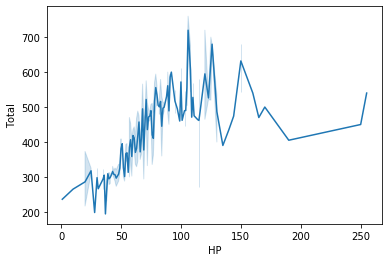

In [19]:
sb.lineplot(x = 'HP', y = 'Total', data = pk)
# Aca queria tener una idea approximada de la relacion entre las dos variables.

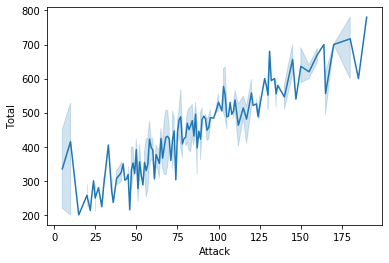

In [21]:
sb.lineplot(x = 'Attack', y = 'Total', data = pk)
# Aca tambien, aunque se que hay mejores graficas para hacer esto, para practicar esta bien.

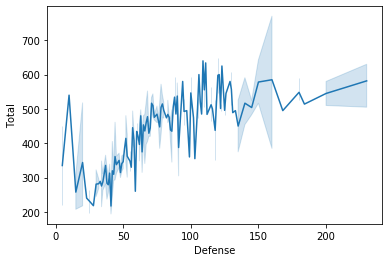

In [20]:
sb.lineplot(x = 'Defense', y = 'Total', data = pk)

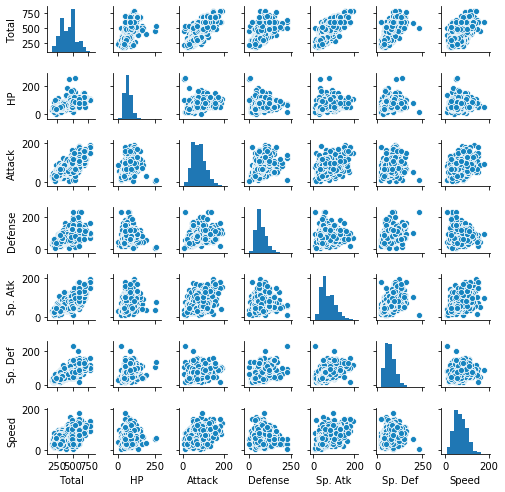

In [67]:
sb.pairplot(pk[['Total', 'HP', 'Attack', 'Defense','Sp. Atk','Sp. Def','Speed']], plot_kws={'color':'#1684BF'}, height=1)
#Salio muy grande

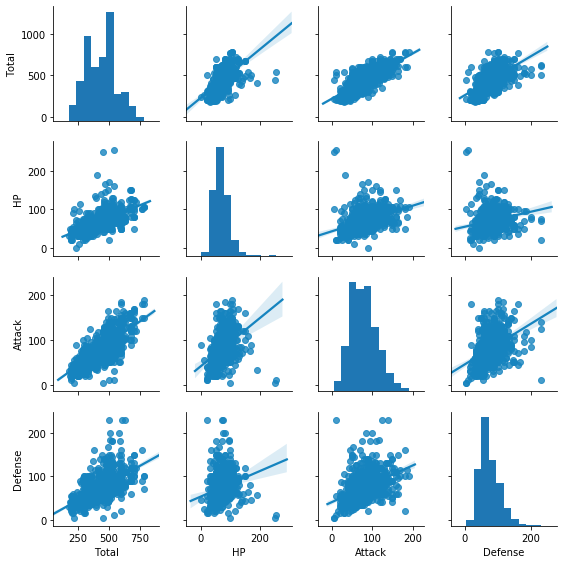

In [53]:
sb.pairplot(pk[['Total', 'HP', 'Attack', 'Defense']], plot_kws={'color':'#1684BF'}, height=2, kind='reg')
#Quiero ver cual de las variables contribuye mas al total, pues esa sera la que quiero 
#buscar y caracterizar en los pokemones.
#Los puntos de salud, por ejemplo, no parecen contribuir tanto al total como el ataque

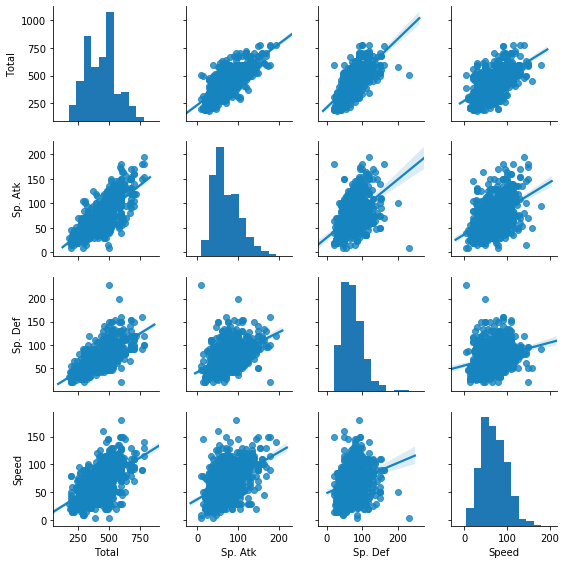

In [52]:
sb.pairplot(pk[['Total', 'Sp. Atk','Sp. Def','Speed']], plot_kws={'color':'#1684BF'}, height=2, kind='reg')
#Mas practica

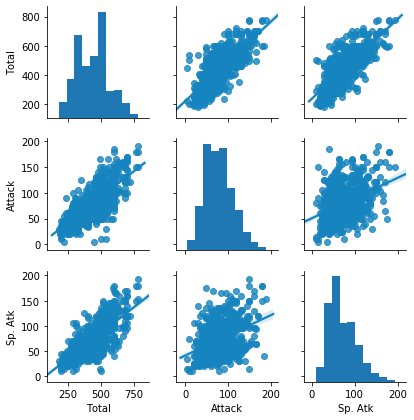

In [51]:
sb.pairplot(pk[['Total', 'Attack', 'Sp. Atk']], plot_kws={'color':'#1684BF'}, height=2, kind='reg') # corner=True
# Encontre en internet como ponerle la diagonal, pero no creo que sea de regresion, aunque se llama reg.
#Leere mas al respecto
#En fin, el attaque es la variable que mas contribuye al total

In [54]:
attk = pk.sort_values('Attack', ascending=False)
attk.head(10)
# 

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,1,True,780
232,214,HeracrossMega Heracross,Bug,Fighting,80,185,115,40,105,75,2,False,600
424,383,GroudonPrimal Groudon,Ground,Fire,100,180,160,150,90,90,3,True,770
426,384,RayquazaMega Rayquaza,Dragon,Flying,105,180,100,180,100,115,3,True,780
429,386,DeoxysAttack Forme,Psychic,NaN,50,180,20,180,20,150,3,True,600
711,646,KyuremBlack Kyurem,Dragon,Ice,125,170,100,120,90,95,5,True,700
494,445,GarchompMega Garchomp,Dragon,Ground,108,170,115,120,95,92,4,False,700
527,475,GalladeMega Gallade,Psychic,Fighting,68,165,95,65,115,110,4,False,618
387,354,BanetteMega Banette,Ghost,NaN,64,165,75,93,83,75,3,False,555
454,409,Rampardos,Rock,NaN,97,165,60,65,50,58,4,False,495


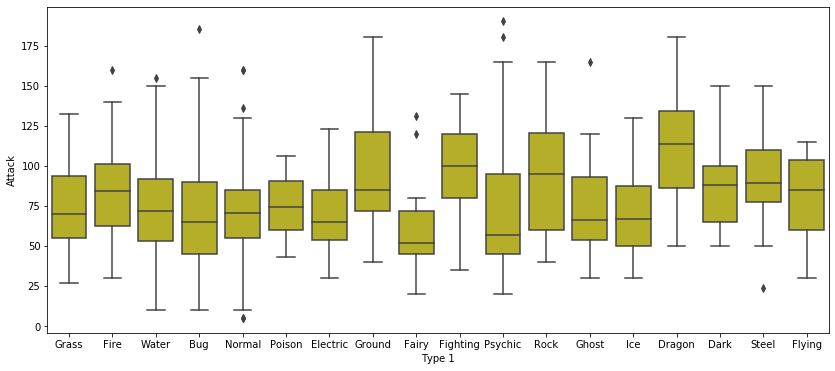

In [60]:
plt.figure(figsize=(14, 6)) # This allows me to change the figure size, so the data is not cramped.
sb.boxplot(x='Type 1', y='Attack',data=pk, color='#CBC311') # , width=2
#sb.swarmplot(x='Type 1', y='Attack',data=pk, color='red')

# Checking the variation in the attack variable for each pokemon type 1

In [63]:
pk.loc[(pk['Type 1'] == "Fairy") & (pk['Attack'] > 90)]
#Fairy has the farthest outliers, I am checking who are those, and the values

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
226,210,Granbull,Fairy,NaN,90,120,75,60,60,45,2,False,450
792,716,Xerneas,Fairy,NaN,126,131,95,131,98,99,6,True,680


In [65]:
pk.loc[(pk['Type 1'] == "Normal") & (pk['Attack'] < 15)]
#The lowest attack value is in type Normal pokemons. Their names and values are pulled in 
#this table

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
121,113,Chansey,Normal,NaN,250,5,5,35,105,50,1,False,450
261,242,Blissey,Normal,NaN,255,10,10,75,135,55,2,False,540
488,440,Happiny,Normal,NaN,100,5,5,15,65,30,4,False,220


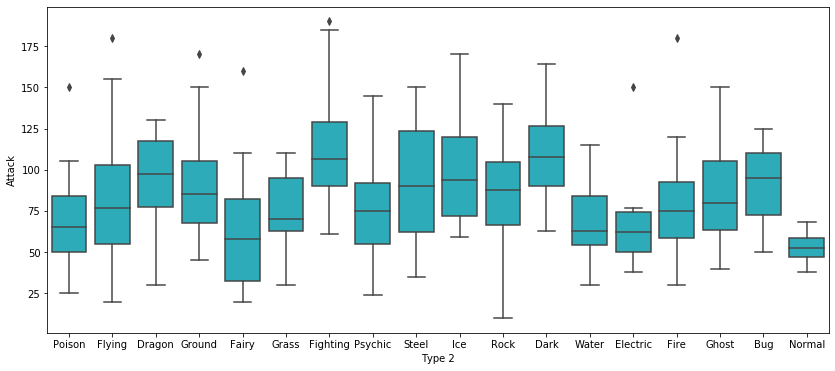

In [69]:
plt.figure(figsize=(14, 6))
sb.boxplot(x='Type 2', y='Attack',data=pk, color='#17becf')
#sb.swarmplot(x='Type 1', y='Total',data=pk, color='red') #Swarm was to crowded and non informative.
#Same analysis for type 2 pokemons

In [71]:
pk['Types'] = pk['Type 1'] + pk['Type 2']
pk.head(5)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total,Types
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318,GrassPoison
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405,GrassPoison
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525,GrassPoison
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625,GrassPoison
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,309,NaN


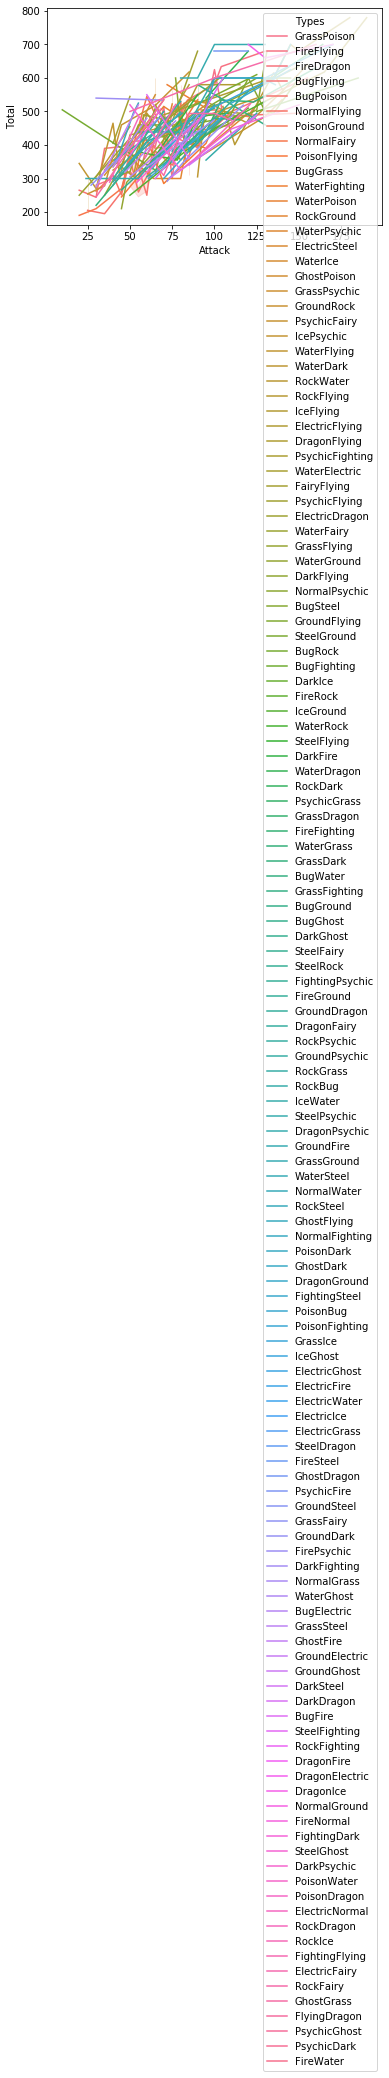

In [74]:
sb.lineplot(x = 'Attack', y = 'Total', data = pk, hue='Types')
#Son muchos datos, pero me gustaria hacer una grafica en donde hayan lineas para cada tipo.
#Pero me di cuenta que son muchos categorias dentro de cada tipo. Tocaria hacer grupos mas pequenos.
#Por ahora queda asi.

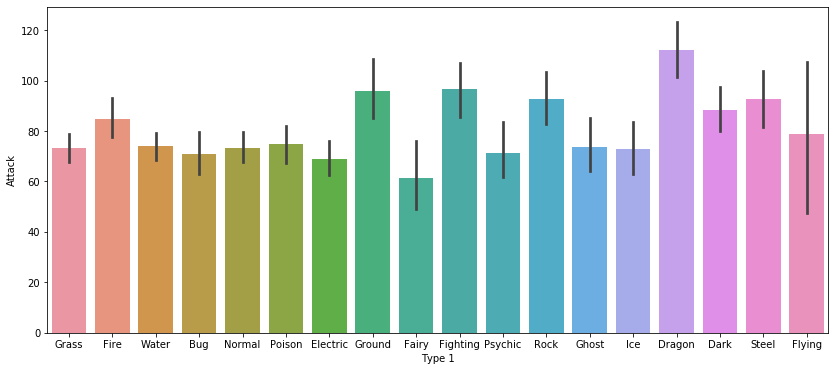

In [83]:
plt.figure(figsize=(14, 6))
sb.barplot(x = 'Type 1', y = 'Attack', data = pk)
#Siminal analysis but in another type of graph. We can see that in this case, the 
#box and whiskers provide more information and in a more clear representation

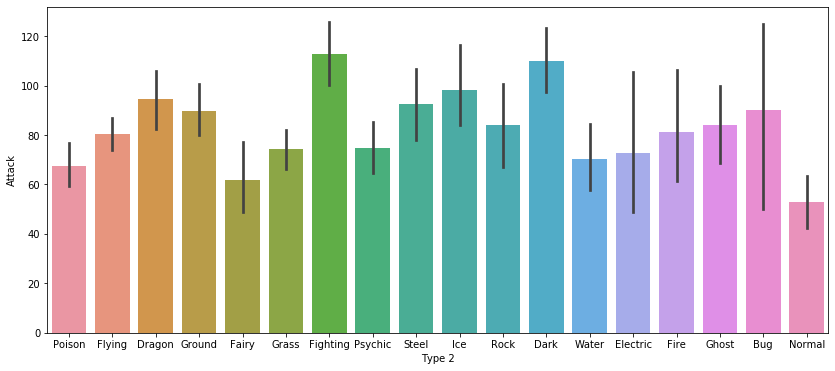

In [81]:
plt.figure(figsize=(14, 6))
sb.barplot(x = 'Type 2', y = 'Attack', data = pk)
# Just practice

In [ ]:
#Thanks